In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sqlite3
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_json('players_preprocessed_plus_info.json')
df

,jugador_id,nombre,nacionalidad,peso,altura,fecha_nacimiento,GK,DF,MF,FW,...,Fouls_Committed,Fouls_Drawn,Offsides,Penalty_Kicks_Won,Penalty_Kicks_Conceded,Own_Goals,Ball_Recoveries,Aerials_won,Aerials_lost,percentage_of_Aerials_Won
0,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,-1.049891,0.673855,-0.681958,1.392924,-0.436844,-0.229797,-0.417708,-1.199071,-0.336345,-2.424588
1,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,-0.652155,-0.440371,-0.472236,0.499803,-0.436844,-0.229797,-0.116680,-0.963890,-0.503854,-1.194403
2,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,-0.572608,-0.261071,-0.367375,-0.393319,0.782130,-0.229797,-0.055712,-0.899012,-0.327529,-1.200679
3,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,-0.795340,0.161567,-0.227561,-0.393319,-0.436844,-0.229797,-0.871155,-0.939561,-0.309896,-1.363867
4,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,-0.477151,-0.248264,0.366651,0.797510,-0.436844,-0.229797,-0.524402,-0.963890,-0.794790,-0.667181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,0.016041,-0.504407,-0.507189,-0.393319,1.086873,-0.229797,0.714005,-1.142303,-0.785974,-1.646308
6513,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,-0.270328,-0.709323,-0.681958,-0.393319,-0.436844,-0.229797,1.037896,-0.607063,-0.539119,-0.089746
6514,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,-1.065800,-1.093539,-0.681958,-0.393319,-0.436844,-0.229797,0.565396,-0.582734,-0.697811,0.286841
6515,403f5d20,Olivier Boscagli,France,68.0,181.0,18/11/1997,0,1,0,0,...,-1.097619,1.339829,-0.681958,-0.393319,-0.436844,-0.229797,0.588259,-0.363772,0.139733,-0.503993


# Categorias

In [3]:
dict_tiro = {
  'Goals' : 1,
  'Non_Penalty_Goals' : 1,
  'Penalty_Kicks_Made' : 1,
  'Penalty_Kicks_Attempted' : 0,
  'xG' : 1,
  'npxG' : 1,
  'Shots_Total' : 0,
  'Shots_on_target' : 1,
  'Shots_on_target_percentage' : 1,
  'Goals_per_Shot' : 1,
  'Goals_per_Shot_on_target' : 1,
  'Average_Shot_Distance' : 1,
  'Shots_from_free_kicks' : 1,
  'npxG_per_Sh' : 1,
  'Goals_minus_xG' : 1,
  'Non_Penalty_Goals_minus_npxG' : 1,
  'SCA_Sh_' : 1,
  'GCA_Sh_' : 1,
  'npxG_plus_xA' : 1
}
dict_tiro

{'Goals': 1,
 'Non_Penalty_Goals': 1,
 'Penalty_Kicks_Made': 1,
 'Penalty_Kicks_Attempted': 0,
 'xG': 1,
 'npxG': 1,
 'Shots_Total': 0,
 'Shots_on_target': 1,
 'Shots_on_target_percentage': 1,
 'Goals_per_Shot': 1,
 'Goals_per_Shot_on_target': 1,
 'Average_Shot_Distance': 1,
 'Shots_from_free_kicks': 1,
 'npxG_per_Sh': 1,
 'Goals_minus_xG': 1,
 'Non_Penalty_Goals_minus_npxG': 1,
 'SCA_Sh_': 1,
 'GCA_Sh_': 1,
 'npxG_plus_xA': 1}

In [4]:
dict_pases = {  
  'npxG_plus_xA' : 1,
  'Assists' : 1,
  'xA' : 1,
  'Passes_Completed' : 1,
  'Passes_Attempted' : 0,
  'Pass_Completion_percentage' : 1,
  'Total_Passing_Distance' : 1,
  'Progressive_Passing_Distance' : 1,
  'Passes_Completed_Short_' : 1,
  'Passes_Attempted_Short_' : 0,
  'Pass_Completion_percentage_Short_' : 1,
  'Passes_Completed_Medium_' : 1,
  'Passes_Attempted_Medium_' : 0,
  'Pass_Completion_percentage_Medium_' : 1,
  'Passes_Completed_Long_' : 1,
  'Passes_Attempted_Long_' : 0,
  'Pass_Completion_percentage_Long_' : 1,
  'Key_Passes' : 1,
  'Passes_into_Final_Third' : 1,
  'Passes_into_Penalty_Area' : 1,
  'Crosses_into_Penalty_Area' : 1,
  'Progressive_Passes' : 1,
  'Live_ball_passes' : 0,
  'Dead_ball_passes' : 0,
  'Passes_from_Free_Kicks' : 0,
  'Through_Balls' : 1,
  'Passes_Under_Pressure' : 1,
  'Switches' : 0,
  'Crosses' : 0,
  'Corner_Kicks' : 1,
  'Inswinging_Corner_Kicks' : 0,
  'Outswinging_Corner_Kicks' : 0,
  'Straight_Corner_Kicks' : 0,
  'Ground_passes' : 0,
  'Low_Passes' : 0,
  'High_Passes' : 0,
  'Passes_Attempted_Left_' : 0,
  'Passes_Attempted_Right_' : 0,
  'Passes_Attempted_Head_' : 0,
  'Throw_Ins_taken' : 1,
  'Passes_Attempted_Other_' : 0,
  'Passes_Offside' : -1,
  'Passes_Out_of_Bounds' : -1,
  'Passes_Intercepted' : -1,
  'Passes_Blocked' : -1,
  'SCA_PassLive_' : 1,
  'SCA_PassDead_' : 1,
  'GCA_PassLive_' : 1,
  'GCA_PassDead_' : 1
}
dict_pases

{'npxG_plus_xA': 1,
 'Assists': 1,
 'xA': 1,
 'Passes_Completed': 1,
 'Passes_Attempted': 0,
 'Pass_Completion_percentage': 1,
 'Total_Passing_Distance': 1,
 'Progressive_Passing_Distance': 1,
 'Passes_Completed_Short_': 1,
 'Passes_Attempted_Short_': 0,
 'Pass_Completion_percentage_Short_': 1,
 'Passes_Completed_Medium_': 1,
 'Passes_Attempted_Medium_': 0,
 'Pass_Completion_percentage_Medium_': 1,
 'Passes_Completed_Long_': 1,
 'Passes_Attempted_Long_': 0,
 'Pass_Completion_percentage_Long_': 1,
 'Key_Passes': 1,
 'Passes_into_Final_Third': 1,
 'Passes_into_Penalty_Area': 1,
 'Crosses_into_Penalty_Area': 1,
 'Progressive_Passes': 1,
 'Live_ball_passes': 0,
 'Dead_ball_passes': 0,
 'Passes_from_Free_Kicks': 0,
 'Through_Balls': 1,
 'Passes_Under_Pressure': 1,
 'Switches': 0,
 'Crosses': 0,
 'Corner_Kicks': 1,
 'Inswinging_Corner_Kicks': 0,
 'Outswinging_Corner_Kicks': 0,
 'Straight_Corner_Kicks': 0,
 'Ground_passes': 0,
 'Low_Passes': 0,
 'High_Passes': 0,
 'Passes_Attempted_Left_': 0,

In [5]:
dict_conduccion_regate = {
  'SCA_Drib_' : 1,
  'SCA_Fld_' : 1,
  'GCA_Drib_' : 1,
  'GCA_Fld_' : 1,
  'Dribbles_Completed' : 1,
  'Dribbles_Attempted' : 0,
  'Successful_Dribble_percentage' : 1,
  'Players_Dribbled_Past' : 1,
  'Nutmegs' : 1,
  'Carries' : 1,
  'Total_Carrying_Distance' : 1,
  'Progressive_Carrying_Distance' : 1,
  'Progressive_Carries' : 1,
  'Carries_into_Final_Third' : 1,
  'Carries_into_Penalty_Area' : 1,
  'Dispossessed' : -1,
  'Fouls_Drawn' : 1,
  'Offsides' : -1,
  'Penalty_Kicks_Won' : 1
}
dict_conduccion_regate

{'SCA_Drib_': 1,
 'SCA_Fld_': 1,
 'GCA_Drib_': 1,
 'GCA_Fld_': 1,
 'Dribbles_Completed': 1,
 'Dribbles_Attempted': 0,
 'Successful_Dribble_percentage': 1,
 'Players_Dribbled_Past': 1,
 'Nutmegs': 1,
 'Carries': 1,
 'Total_Carrying_Distance': 1,
 'Progressive_Carrying_Distance': 1,
 'Progressive_Carries': 1,
 'Carries_into_Final_Third': 1,
 'Carries_into_Penalty_Area': 1,
 'Dispossessed': -1,
 'Fouls_Drawn': 1,
 'Offsides': -1,
 'Penalty_Kicks_Won': 1}

In [6]:
dict_posesion_balon = {
  'Touches' : 1,
  'Touches_Def_Pen_' : 0,
  'Touches_Def_3rd_' : 0,
  'Touches_Mid_3rd_' : 0,
  'Touches_Att_3rd_' : 0,
  'Touches_Att_Pen_' : 0,
  'Touches_Live_Ball_' : 0,
  'Miscontrols' : -1,
  'Pass_Targets' : 1,
  'Passes_Received' : 1,
  'Passes_Received_percentage' : 1,
  'Progressive_Passes_Rec' : 1
}
dict_posesion_balon

{'Touches': 1,
 'Touches_Def_Pen_': 0,
 'Touches_Def_3rd_': 0,
 'Touches_Mid_3rd_': 0,
 'Touches_Att_3rd_': 0,
 'Touches_Att_Pen_': 0,
 'Touches_Live_Ball_': 0,
 'Miscontrols': -1,
 'Pass_Targets': 1,
 'Passes_Received': 1,
 'Passes_Received_percentage': 1,
 'Progressive_Passes_Rec': 1}

In [7]:
dict_otro_ataque = {
  'Shot_Creating_Actions' : 1,
  'SCA_Def_' : 1,
  'Goal_Creating_Actions' : 1,
  'GCA_Def_' : 1
}
dict_otro_ataque

{'Shot_Creating_Actions': 1,
 'SCA_Def_': 1,
 'Goal_Creating_Actions': 1,
 'GCA_Def_': 1}

In [8]:
dict_entradas = {
  'Tackles' : 0,
  'Tackles_Won' : 1,
  'Tackles_Def_3rd_' : 1,
  'Tackles_Mid_3rd_' : 1,
  'Tackles_Att_3rd_' : 1,
  'Dribblers_Tackled' : 1,
  'Dribbles_Contested' : 1,
  'percentage_of_dribblers_tackled' : 1,
  'Dribbled_Past' : -1,
  'Tkl_plus_Int' : 1
}
dict_entradas

{'Tackles': 0,
 'Tackles_Won': 1,
 'Tackles_Def_3rd_': 1,
 'Tackles_Mid_3rd_': 1,
 'Tackles_Att_3rd_': 1,
 'Dribblers_Tackled': 1,
 'Dribbles_Contested': 1,
 'percentage_of_dribblers_tackled': 1,
 'Dribbled_Past': -1,
 'Tkl_plus_Int': 1}

In [9]:
dict_presion = {
  'Pressures' : 0,
  'Successful_Pressures' : 1,
  'Successful_Pressure_percentage' : 1,
  'Pressures_Def_3rd_' : 1,
  'Pressures_Mid_3rd_' : 1,
  'Pressures_Att_3rd_' : 1
}
dict_presion

{'Pressures': 0,
 'Successful_Pressures': 1,
 'Successful_Pressure_percentage': 1,
 'Pressures_Def_3rd_': 1,
 'Pressures_Mid_3rd_': 1,
 'Pressures_Att_3rd_': 1}

In [10]:
dict_tarjetas_faltas = {
  'Yellow_Cards' : -1,
  'Red_Cards' : -1,
  'Second_Yellow_Card' : -1,
  'Fouls_Committed' : -1,
  'Penalty_Kicks_Conceded' : -1
}
dict_tarjetas_faltas

{'Yellow_Cards': -1,
 'Red_Cards': -1,
 'Second_Yellow_Card': -1,
 'Fouls_Committed': -1,
 'Penalty_Kicks_Conceded': -1}

In [11]:
dict_bloqueos_intercepciones = {
  'Blocks' : 1,
  'Shots_Blocked' : 1,
  'Shots_Saved' : 1,
  'Passes_Blocked_in_Defense' : 1,
  'Interceptions' : 1
}
dict_bloqueos_intercepciones

{'Blocks': 1,
 'Shots_Blocked': 1,
 'Shots_Saved': 1,
 'Passes_Blocked_in_Defense': 1,
 'Interceptions': 1}

In [12]:
dict_recuperaciones = {
  'Ball_Recoveries' : 1
}
dict_recuperaciones

{'Ball_Recoveries': 1}

In [13]:
dict_otro_defensa = {
  'Clearances' : 0,
  'Errors' : -1,
  'Own_Goals' : -1
}
dict_otro_defensa

{'Clearances': 0, 'Errors': -1, 'Own_Goals': -1}

In [14]:
dict_aereo = {
  'Aerials_won' : 1,
  'Aerials_lost' : -1,
  'percentage_of_Aerials_Won' : 1,
}
dict_aereo

{'Aerials_won': 1, 'Aerials_lost': -1, 'percentage_of_Aerials_Won': 1}

In [15]:
def calculate_category(player,dictionary):
  category = []
  for key, value in dictionary.items():
    category.append(player[key]*value)
  return np.mean(category)

In [16]:
jugador_id = []
nombre = []
nacionalidad = []
peso = []
altura = []
fecha_nacimiento = []
GK = []
DF = []
MF = []
FW = []
CB = []
FB = []
DM = []
CM = []
AM = []
WM = []
id_campeonato = []
temporada = []
tiro = []
pases = []
conduccion_regate = []
posesion_balon = []
otro_ataque = []
entradas = []
presion = []
tarjetas_faltas = []
bloqueos_intercepciones = []
recuperaciones = []
otro_defensa = []
aereo = []

for index, row in df.iterrows():
  jugador_id.append(row['jugador_id'])
  nombre.append(row['nombre'])
  nacionalidad.append(row['nacionalidad'])
  peso.append(row['peso'])
  altura.append(row['altura'])
  fecha_nacimiento.append(row['fecha_nacimiento'])
  GK.append(row['GK'])
  DF.append(row['DF'])
  MF.append(row['MF'])
  FW.append(row['FW'])
  CB.append(row['CB'])
  FB.append(row['FB'])
  DM.append(row['DM'])
  CM.append(row['CM'])
  AM.append(row['AM'])
  WM.append(row['WM'])
  id_campeonato.append(row['id_campeonato'])
  temporada.append(row['temporada'])
  tiro.append(calculate_category(row,dict_tiro))
  pases.append(calculate_category(row,dict_pases))
  conduccion_regate.append(calculate_category(row,dict_conduccion_regate))
  posesion_balon.append(calculate_category(row,dict_posesion_balon))
  otro_ataque.append(calculate_category(row,dict_otro_ataque))
  entradas.append(calculate_category(row,dict_entradas))
  presion.append(calculate_category(row,dict_presion))
  tarjetas_faltas.append(calculate_category(row,dict_tarjetas_faltas))
  bloqueos_intercepciones.append(calculate_category(row,dict_bloqueos_intercepciones))
  recuperaciones.append(calculate_category(row,dict_recuperaciones))
  otro_defensa.append(calculate_category(row,dict_otro_defensa))
  aereo.append(calculate_category(row,dict_aereo))
  
dict_categories = {
  'jugador_id' : jugador_id,
  'nombre' : nombre,
  "nacionalidad" : nacionalidad,
  'peso' : peso,
  'altura' : altura,
  'fecha_nacimiento' : fecha_nacimiento,
  'GK' : GK,
  'DF' : DF,
  'MF' : MF,
  'FW' : FW,
  'CB' : CB,
  'FB' : FB,
  'DM' : DM,
  'CM' : CM,
  'AM' : AM,
  'WM' : WM,
  'id_campeonato' : id_campeonato, 
  'temporada' : temporada, 
  'tiro' : tiro, 
  'pases' : pases, 
  'conduccion_regate' : conduccion_regate,
  'posesion_balon' : posesion_balon,
  'otro_ataque' : otro_ataque,
  'entradas' : entradas,
  'presion' : presion,
  'tarjetas_faltas' : tarjetas_faltas,
  'bloqueos_intercepciones' : bloqueos_intercepciones,
  'recuperaciones' : recuperaciones,
  'otro_defensa' : otro_defensa,
  'aereo' : aereo
}

df_categories = pd.DataFrame(dict_categories)

In [17]:
df_categories

,jugador_id,nombre,nacionalidad,peso,altura,fecha_nacimiento,GK,DF,MF,FW,...,conduccion_regate,posesion_balon,otro_ataque,entradas,presion,tarjetas_faltas,bloqueos_intercepciones,recuperaciones,otro_defensa,aereo
0,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,0.880219,0.413298,0.108487,-0.149110,0.302470,0.714764,-0.493154,-0.417708,-0.248692,-1.095772
1,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,0.676793,0.309554,0.538570,0.047384,0.586353,0.502248,-0.113098,-0.116680,-0.002457,-0.551480
2,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,0.809256,0.557171,0.712072,0.049396,0.268736,0.050478,-0.118084,-0.055712,0.243778,-0.590721
3,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,0.889007,0.394812,0.659067,-0.277132,0.069372,0.338819,-0.671515,-0.871155,0.243778,-0.664511
4,3eb22ec9,Bernardo Silva,Portugal,65.0,173.0,10/08/1994,0,0,1,1,...,0.836911,0.388632,0.379274,0.012514,-0.094074,0.319505,-0.458063,-0.524402,0.243778,-0.278760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,-0.407071,-0.048740,-0.383764,0.425546,0.219210,-0.157749,0.321523,0.714005,0.243778,-0.667546
6513,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,-0.290974,-0.095359,-0.488403,0.180146,0.895055,0.263366,0.247604,1.037896,0.243778,-0.052564
6514,0d2158d5,Jordan Marié,France,69.0,177.0,29/09/1991,0,0,1,0,...,-0.406046,-0.013327,-0.777662,0.386997,0.647631,0.525880,-0.130490,0.565396,-0.823240,0.133973
6515,403f5d20,Olivier Boscagli,France,68.0,181.0,18/11/1997,0,1,0,0,...,0.127817,0.291722,0.045208,-0.102026,-0.056620,0.576567,0.956029,0.588259,0.243778,-0.335832


In [18]:
df_categories.to_json('players_categories.json')

# Pareto n dimensiones

In [19]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row) 
  
  
def simple_cull(inputPoints):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow[1], row[1]):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(tuple(i) for i in row))
            elif dominates(row[1], candidateRow[1]):
                nonDominated = False
                dominatedPoints.add(tuple(tuple(i) for i in candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(tuple(i) for i in candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

In [20]:
def pareto_position_country_season(df,position,country,season,categories):
  data = df.loc[df['nacionalidad'] == country].loc[df[position] == 1].loc[df['temporada'] == season]
  
  ids = ['jugador_id','id_campeonato','temporada','nombre']
  ids_points = data[ids].to_numpy().tolist()
    
  points = data[categories].to_numpy().tolist()
  input_points = list(zip(ids_points,points))
  pareto, dominated = simple_cull(input_points)
  
  return pareto

In [21]:
categories = ['pases','tiro']
pareto = pareto_position_country_season(df_categories,'FW','England','2017-2018',categories)
for player in pareto:
  print(player[0][3],end=", ")

Raheem Sterling, Harry Kane, Jadon Sancho, 

In [22]:
categories = ['tiro','pases','presion','conduccion_regate']
pareto = pareto_position_country_season(df_categories,'FW','Spain','2020-2021',categories)
for player in pareto:
  print(player[0][3],end=", ")

Álex Berenguer, Yeremi Pino, Dani Olmo, Rodrigo, Borja Mayoral, Ayoze Pérez, Nolito, Luis Alberto, Iago Aspas, Pablo Sarabia, Gerard Moreno, Rubén Rochina, Borja Iglesias, Carles Pérez, Brais Méndez, Isco, Ferrán Torres, Iker Muniain, Adama Traoré, Lucas Vázquez, 

In [23]:
categories = ['tiro','pases','conduccion_regate','otro_ataque']
pareto = pareto_position_country_season(df_categories,'FW','England','2020-2021',categories)
for player in pareto:
  print(player[0][3],end=", ")

Marc Albrighton, Raheem Sterling, Harry Kane, Jesse Lingard, Jack Grealish, Phil Foden, Jadon Sancho, 

In [24]:
categories = ['tiro','pases','conduccion_regate']
pareto = pareto_position_country_season(df_categories,'FW','Spain','2017-2018',categories)
for player in pareto:
  print(player[0][3],end=", ")

Isco, Santi Mina, Iago Aspas, David Silva, Paco Alcácer, Iker Muniain, Luis Alberto, 

In [25]:
categories = ['tiro','pases','conduccion_regate']
pareto = pareto_position_country_season(df_categories,'FW','Spain','2017-2018',categories)
for player in pareto:
  print(player[0][3],end=", ")

Isco, Santi Mina, Iago Aspas, David Silva, Paco Alcácer, Iker Muniain, Luis Alberto, 

In [26]:
categories = ['tiro','pases','conduccion_regate']
pareto = pareto_position_country_season(df_categories,'FW','Spain','2020-2021',categories)
for player in pareto:
  print(player[0][3],end=", ")

Gerard Moreno, Rodrigo, Isco, Yeremi Pino, Iker Muniain, Luis Alberto, Iago Aspas, Adama Traoré, Pablo Sarabia, Carles Pérez, 

In [27]:
categories = ['tiro','pases','posesion_balon','recuperaciones',]
pareto = pareto_position_country_season(df_categories,'MF','England','2020-2021',categories)
for player in pareto:
  print(player[0][3],end=", ")

Jordan Henderson, Mason Mount, Jack Grealish, Luke Shaw, James Ward-Prowse, James Maddison, Phil Foden, Jadon Sancho, Jesse Lingard, Ben Chilwell, Josh Brownhill, Curtis Jones, Joe Willock, 

In [28]:
categories = ['tiro','pases','entradas','bloqueos_intercepciones','recuperaciones']
pareto = pareto_position_country_season(df_categories,'DF','England','2020-2021',categories)
for player in pareto:
  print(player[0][3],end=", ")

Lewis Dunk, Luke Shaw, Ben Godfrey, Ben Mee, Tyrick Mitchell, Kortney Hause, Chris Basham, Harry Maguire, Ben Johnson, James Tarkowski, Rhys Williams, Declan Rice, Nathaniel Phillips, Tyrone Mings, Aaron Wan-Bissaka, Trent Alexander-Arnold, Jacob Murphy, Adam Webster, Jamaal Lascelles, James Milner, John Stones, Ben Chilwell, Fikayo Tomori, Conor Townsend, Ryan Sessegnon, Luke Ayling, Kieran Trippier, Matt Targett, Solly March, Michael Keane, Marc Albrighton, Kyle Bartley, Reece James, 

# Gráficas

In [29]:
df_categories_spain_fw_2020_2021 = df_categories.loc[df['nacionalidad'] == 'Spain'].loc[df['temporada'] == '2020-2021'].loc[df['FW'] == 1]
df_categories_spain_fw_2020_2021

,jugador_id,nombre,nacionalidad,peso,altura,fecha_nacimiento,GK,DF,MF,FW,...,conduccion_regate,posesion_balon,otro_ataque,entradas,presion,tarjetas_faltas,bloqueos_intercepciones,recuperaciones,otro_defensa,aereo
79,9e1035f8,Ferrán Torres,Spain,77.0,184.0,29/02/2000,0,0,1,1,...,0.326473,-0.131860,0.393911,-0.434282,-0.013839,0.436340,-0.577475,-1.412244,0.243778,-0.417465
554,82927de4,Pablo Fornals,Spain,67.0,178.0,22/02/1996,0,0,1,1,...,-0.176178,-0.096640,0.228043,-0.462206,-0.037784,0.415426,0.108864,-0.265289,-0.084535,-0.249541
650,9a28eba4,Adama Traoré,Spain,72.0,178.0,25/01/1996,0,0,1,1,...,1.616037,-0.249191,0.359513,-0.350084,-0.292623,0.177008,-0.769106,-1.050248,-0.002457,0.085212
808,819aa8e7,Ayoze Pérez,Spain,68.0,179.0,23/07/1993,0,0,1,1,...,0.228203,-0.092071,0.493377,0.078539,0.500818,-0.067998,0.331942,-0.722547,0.243778,-1.221311
1139,1fb1c435,Rodrigo,Spain,73.0,180.0,06/03/1991,0,0,1,1,...,0.246734,0.053728,1.458409,-0.537375,0.010340,-0.314871,-0.941225,-0.455813,0.243778,-0.288046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,a8f21b9f,Carles Pérez,Spain,66.0,172.0,16/02/1998,0,0,1,1,...,1.109438,-0.080962,0.997981,-0.414327,0.402511,0.399757,-0.388211,-1.015954,0.243778,-0.847143
3297,9744ff80,Pablo Sarabia,Spain,70.0,176.0,11/05/1992,0,0,1,1,...,0.091137,0.134339,0.313603,-0.180989,-0.092668,0.511106,-0.646977,-1.404623,0.243778,-0.477253
3645,ae44e8e2,Dani Olmo,Spain,68.0,176.0,07/05/1998,0,0,1,1,...,0.141128,0.259066,1.852398,-0.395186,0.558462,0.611120,-0.671197,0.512049,0.243778,-0.165342
4912,5294a83f,Luis Alberto,Spain,73.0,182.0,28/09/1992,0,0,1,1,...,0.896195,0.374074,0.387122,-0.263926,0.223198,0.422236,-0.405116,0.222453,0.243778,-0.384399


## 1d

In [30]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row) 
  
  
def simple_cull(inputPoints):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow[1], row[1]):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(tuple(i) for i in row))
            elif dominates(row[1], candidateRow[1]):
                nonDominated = False
                dominatedPoints.add(tuple(tuple(i) for i in candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(tuple(i) for i in candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

  
def graphic_pareto_1d(pareto,dominated,category,graph_all):
  #1d
  Xs = []
  for point in pareto:
    Xs.append(point[1][0])
  
  plt.figure(dpi=1200)
  plt.plot(Xs, np.zeros_like(Xs) + 0, 'bo',c='red')
  plt.xlabel(category[0])
  if not graph_all:
    plt.savefig('pareto1d.png',dpi=1200)
    plt.show()

  else:
    #2d
    Xs = []
    for point in dominated:
      Xs.append(point[1][0])

    plt.plot(Xs, np.zeros_like(Xs) + 0, 'bo')
    plt.savefig('pareto1d.png',dpi=1200)
    plt.show()
        
  print(pareto) 
  
def get_pareto_points_1d(df,position,country,season,category,graph_all):
  data = df.loc[df['nacionalidad'] == country].loc[df[position] == 1].loc[df['temporada'] == season]
  ids = ['jugador_id','id_campeonato','temporada','nombre']
  ids_points = data[ids].to_numpy().tolist()
  
  #1d
  pareto_1d = []
  points = data[category].to_numpy().tolist()
  input_points = list(zip(ids_points,points))
  pareto, dominated = simple_cull(input_points)
  pareto_1d.append(pareto)

  graphic_pareto_1d(pareto,dominated,category,graph_all)
    
  return pareto_1d

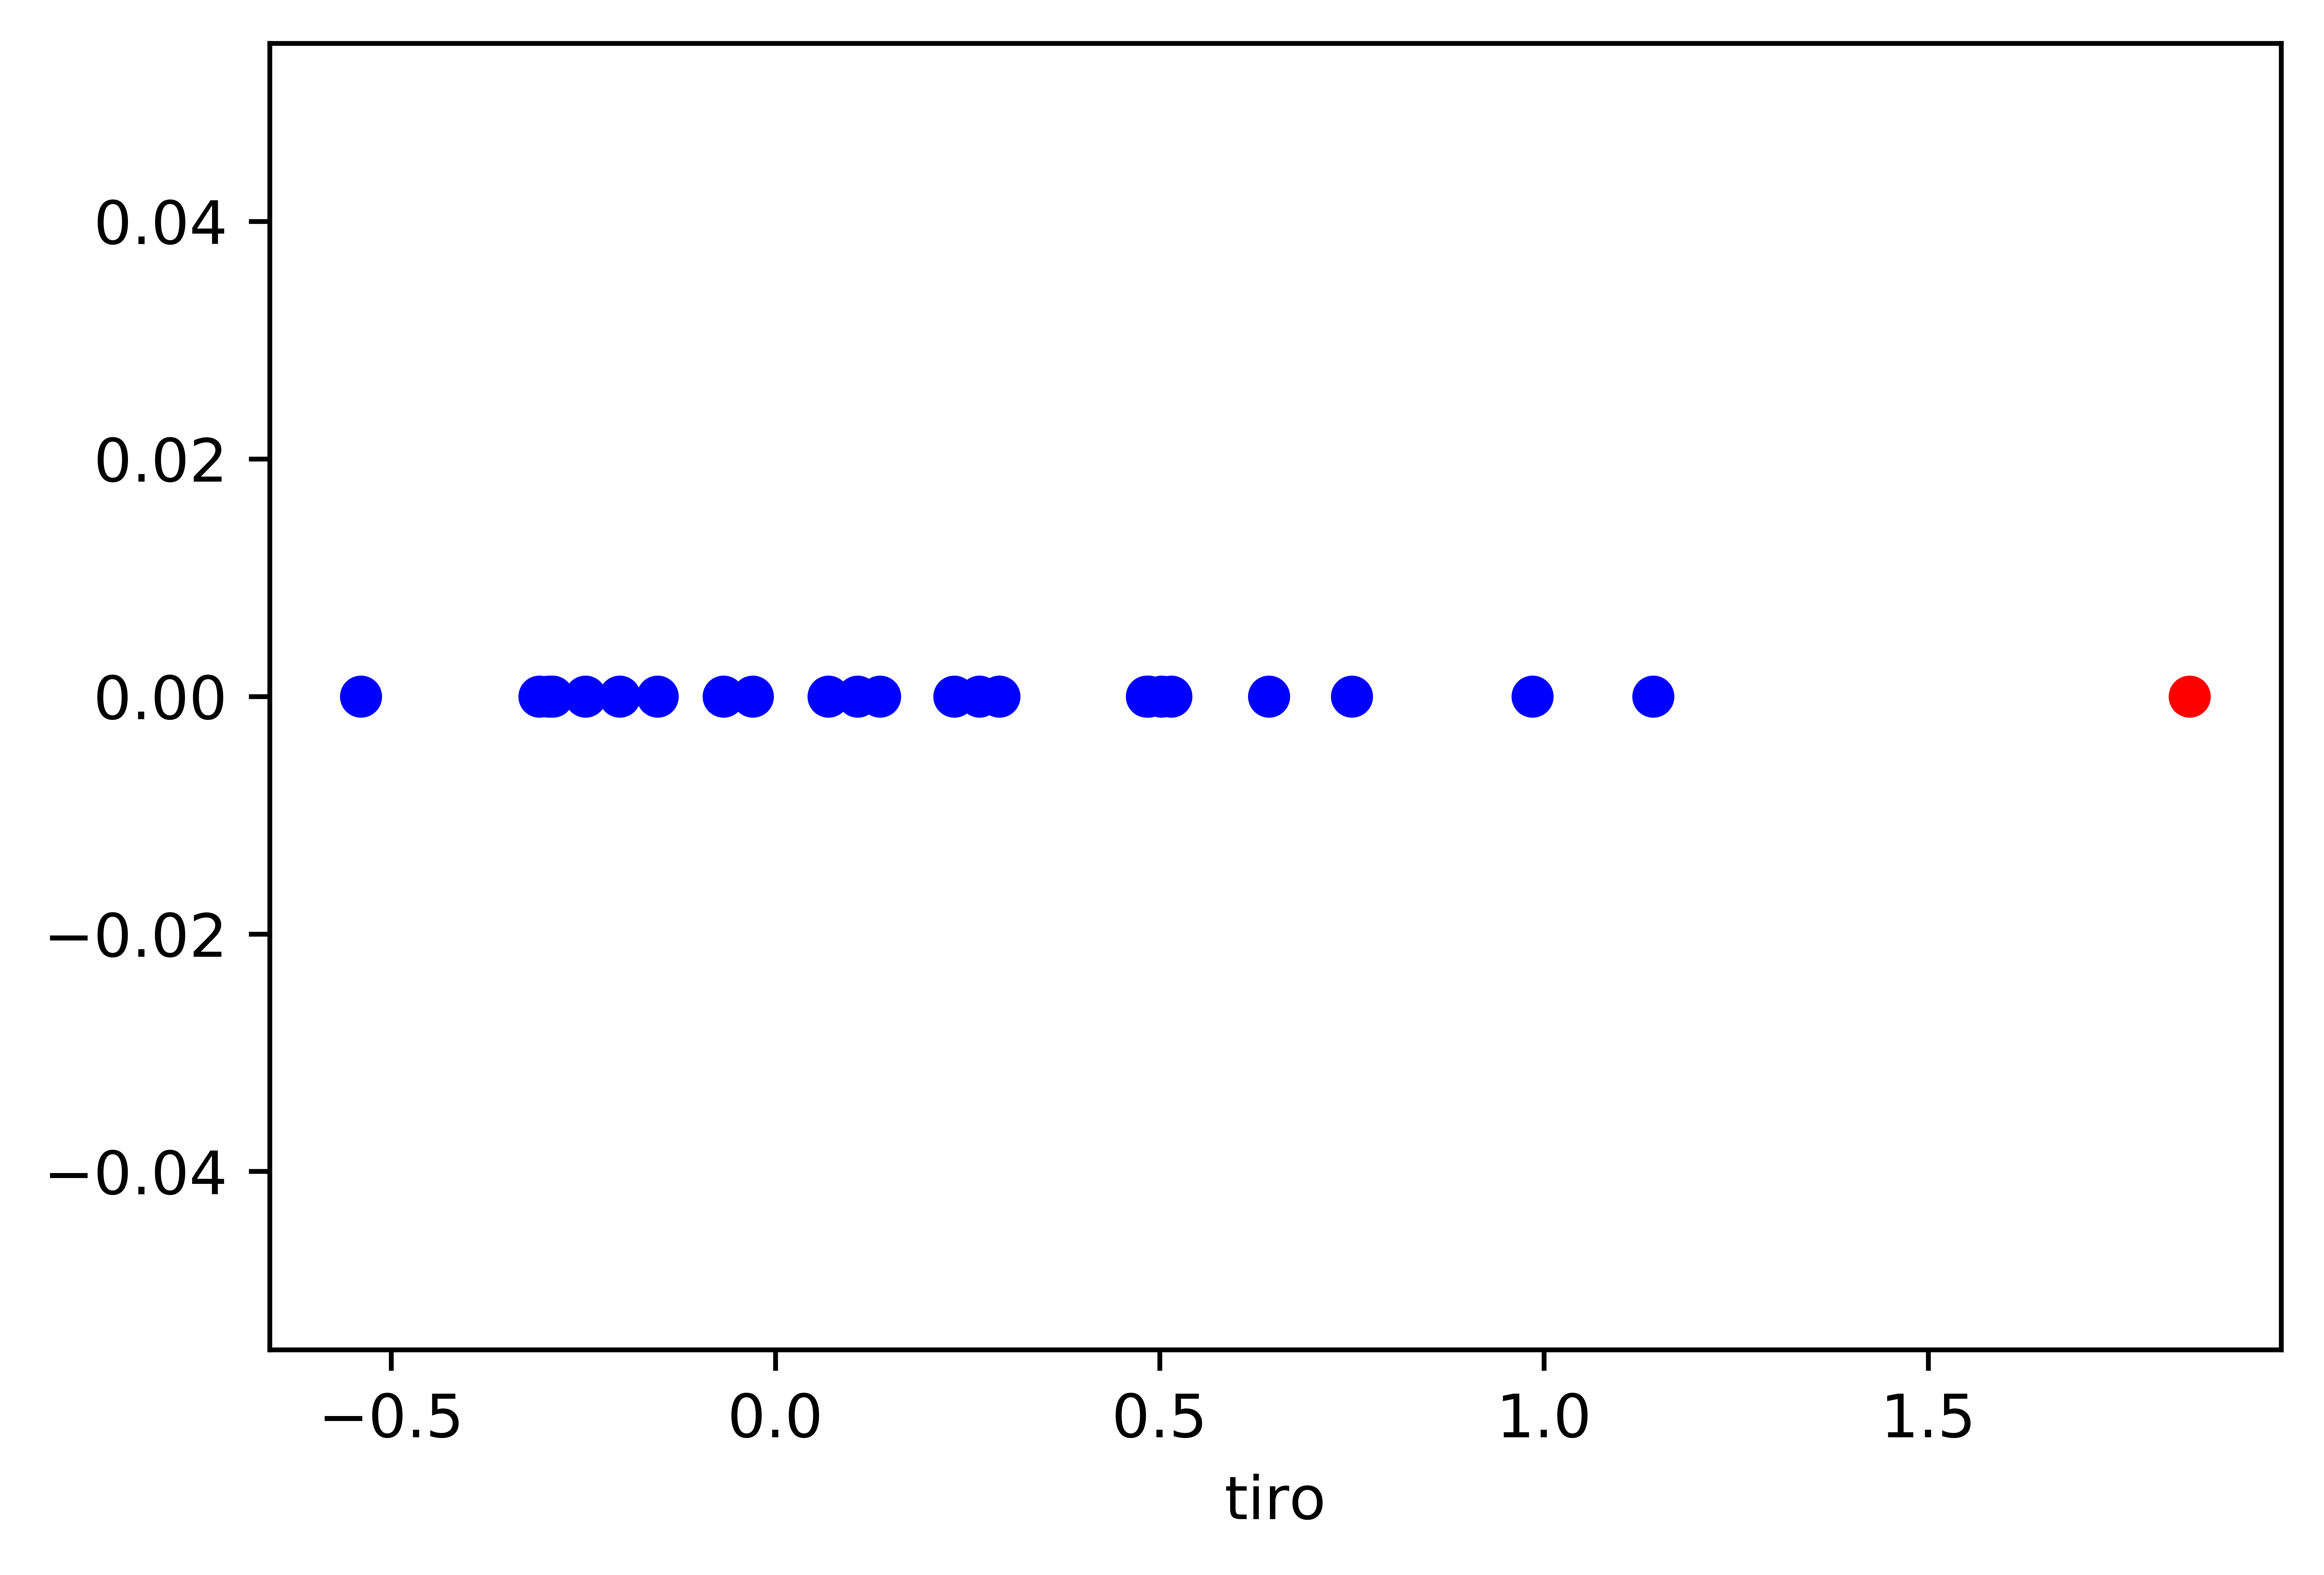

{(('21a66f6a', 1, '2017-2018', 'Harry Kane'), (1.8399685366,))}


In [31]:
category = ['tiro']
pareto_1d = get_pareto_points_1d(df_categories,'FW','England','2017-2018',category,graph_all=True)

# 2d

In [32]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row) 
  
  
def simple_cull(inputPoints):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow[1], row[1]):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(tuple(i) for i in row))
            elif dominates(row[1], candidateRow[1]):
                nonDominated = False
                dominatedPoints.add(tuple(tuple(i) for i in candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(tuple(i) for i in candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

def graphic_pareto_2d(pareto,dominated,categories,combinacion,graph_all):
  #2d
  Xs = []
  Ys = []
  for point in pareto:
    Xs.append(point[1][0])
    Ys.append(point[1][1])
  
  plt.figure(dpi=1200)
  plt.scatter(Xs,Ys,c='red')
  plt.xlabel(categories[combinacion[0]])
  plt.ylabel(categories[combinacion[1]])
  if not graph_all:
    plt.savefig('pareto2d.png',dpi=1200)
    plt.show()
    
  else:
    #2d
    Xs = []
    Ys = []
    for point in dominated:
      Xs.append(point[1][0])
      Ys.append(point[1][1])

    plt.scatter(Xs,Ys)
    plt.savefig('pareto2d.png',dpi=1200)
    plt.show()
        
  print(pareto) 
  
def get_pareto_points_2d(df,position,country,season,categories,graph_all):
  data = df.loc[df['nacionalidad'] == country].loc[df[position] == 1].loc[df['temporada'] == season]
  ids = ['jugador_id','id_campeonato','temporada','nombre']
  ids_points = data[ids].to_numpy().tolist()
  
  #2d
  pareto_2d = []
  combinaciones = list(itertools.combinations(range(len(categories)), 2))
  for combinacion in combinaciones:
    
    points = data[[categories[combinacion[0]],categories[combinacion[1]]]].to_numpy().tolist()
    input_points = list(zip(ids_points,points))
    pareto, dominated = simple_cull(input_points)
    pareto_2d.append(pareto)
    
    graphic_pareto_2d(pareto,dominated,categories,combinacion,graph_all)
    
  return pareto_2d

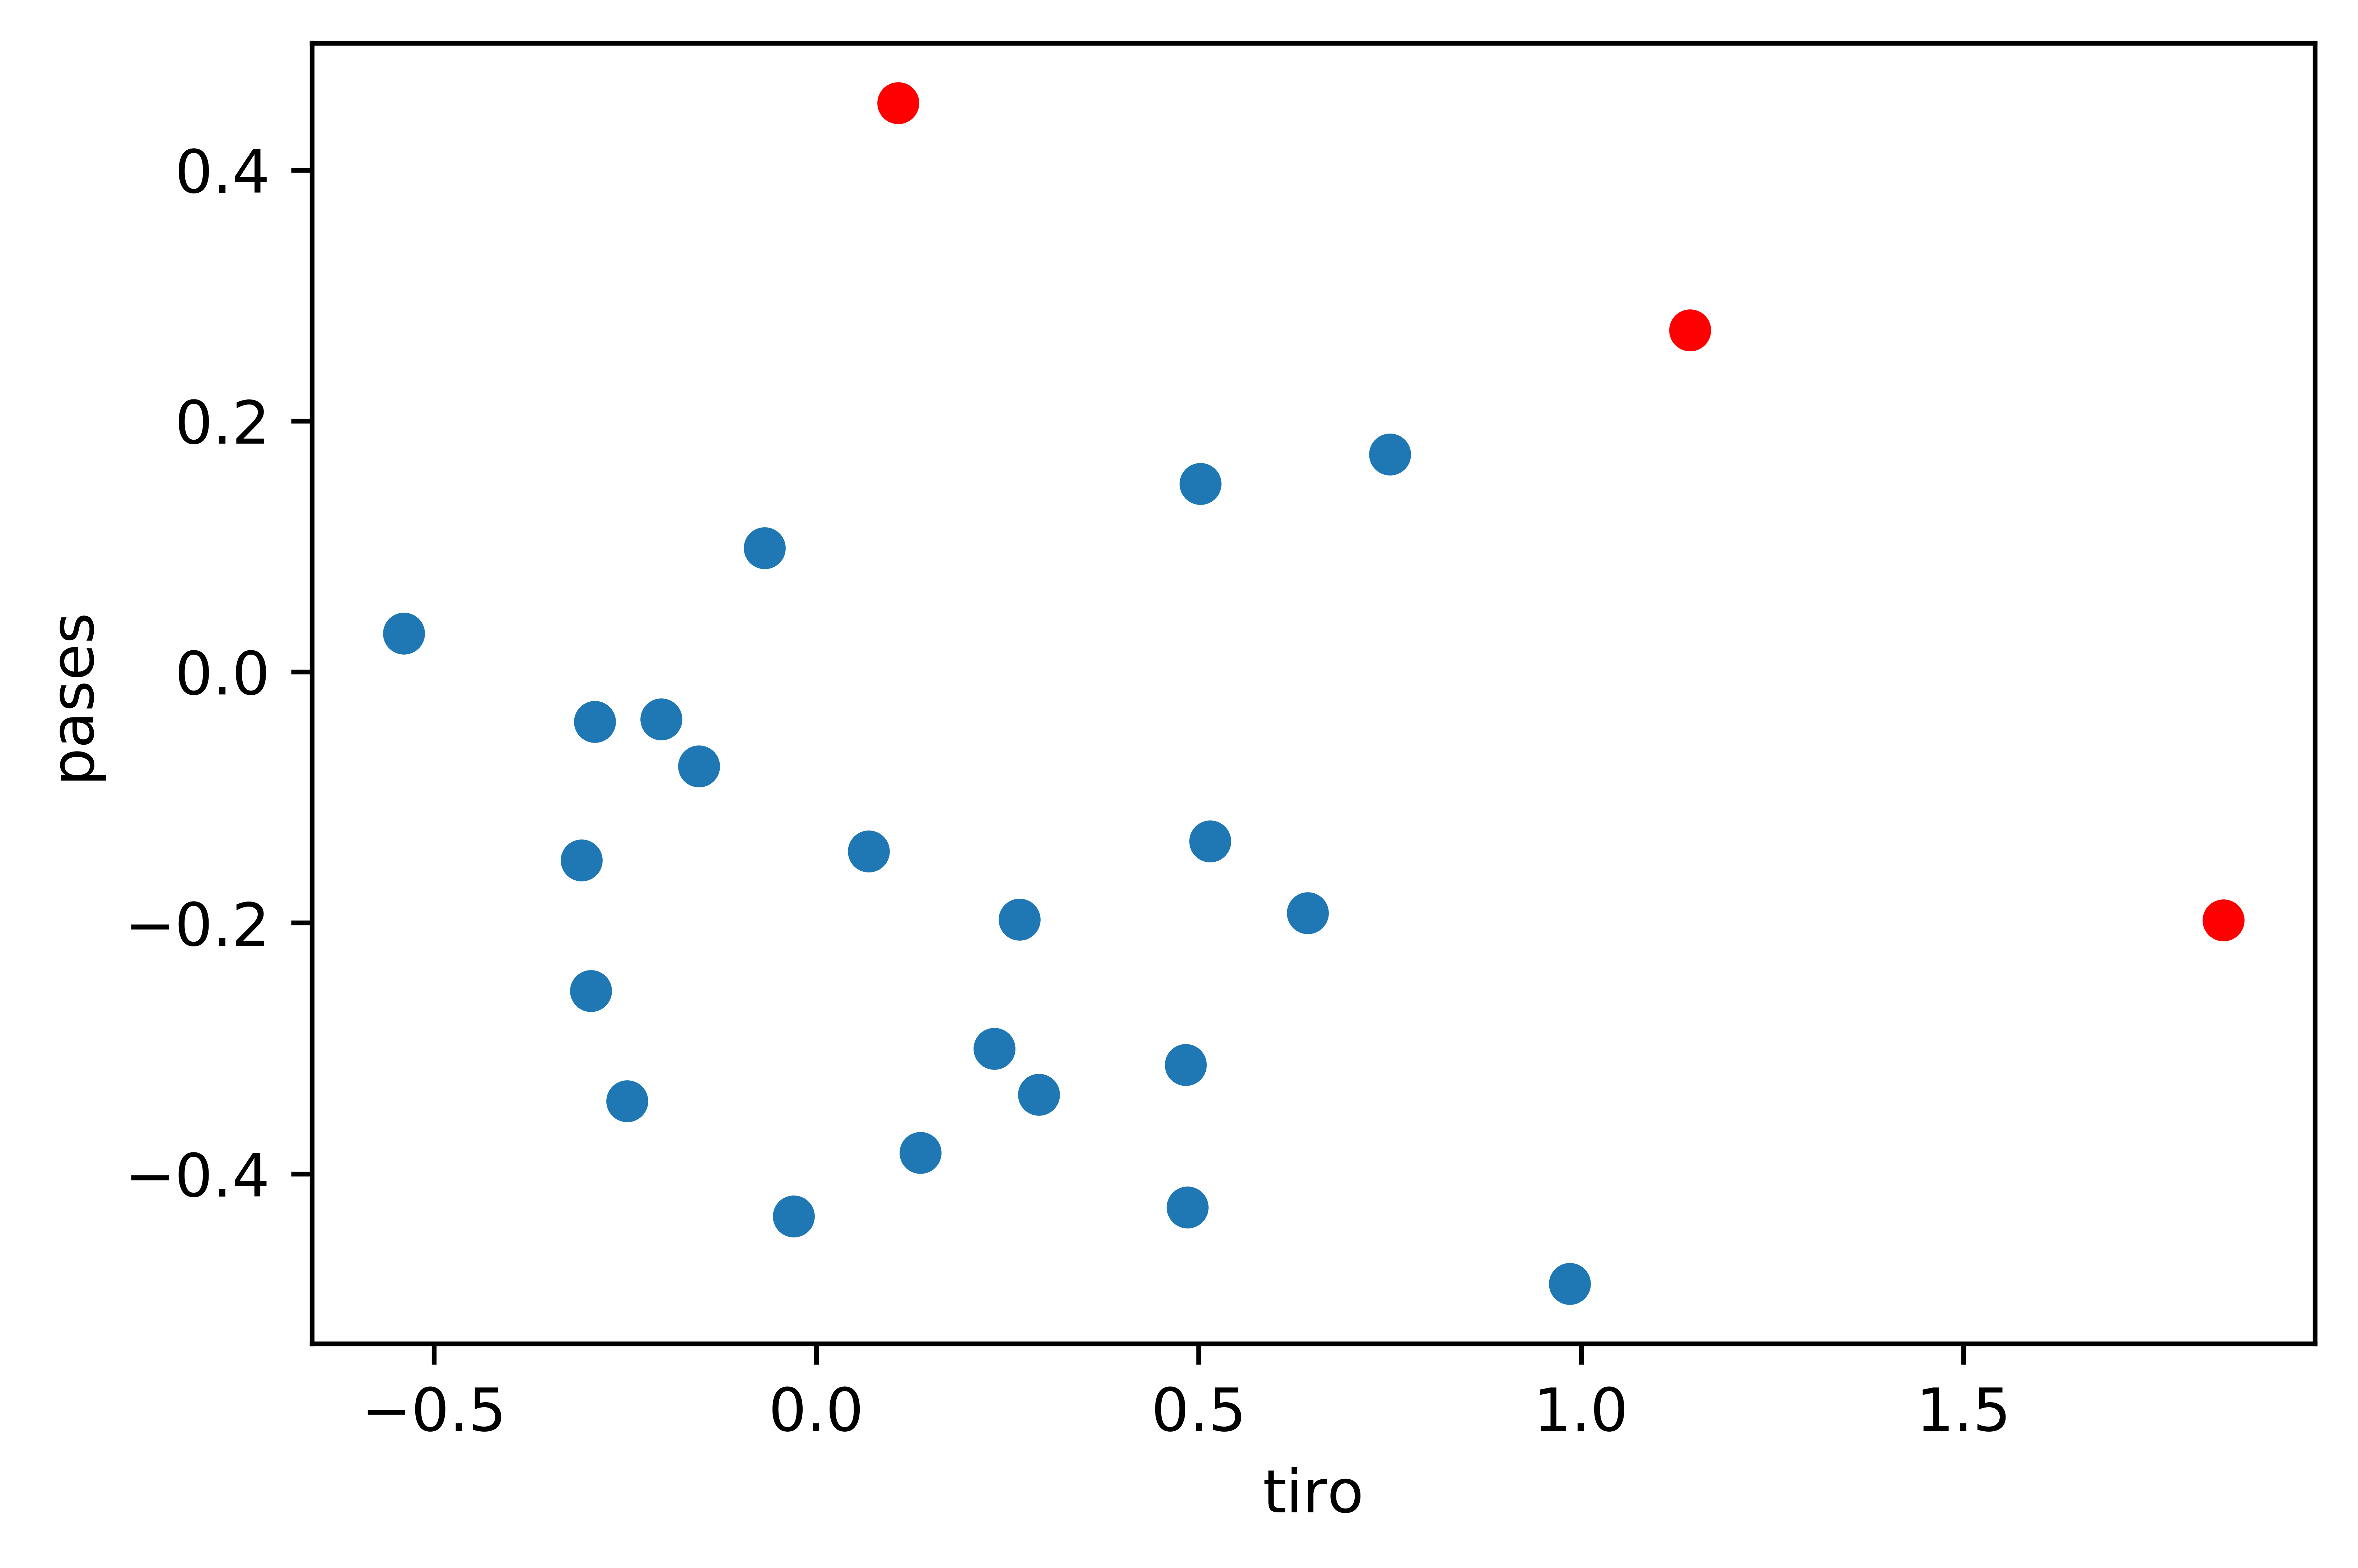

{(('b400bde0', 1, '2017-2018', 'Raheem Sterling'), (1.142164185468421, 0.27227547408979597)), (('21a66f6a', 1, '2017-2018', 'Harry Kane'), (1.8399685366, -0.19785039392448978)), (('dbf053da', 3, '2017-2018', 'Jadon Sancho'), (0.10682216381578946, 0.45330880959795916))}


In [33]:
categories = ['tiro','pases']
pareto_2d = get_pareto_points_2d(df_categories,'FW','England','2017-2018',categories,graph_all=True)

## 3d

In [34]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row) 
  
  
def simple_cull(inputPoints):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow[1], row[1]):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(tuple(i) for i in row))
            elif dominates(row[1], candidateRow[1]):
                nonDominated = False
                dominatedPoints.add(tuple(tuple(i) for i in candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(tuple(i) for i in candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

def graphic_pareto_3d(pareto,dominated,categories,combinacion,graph_all):    
  #3d
  Xs = []
  Ys = []
  Zs = []
  for point in pareto:
    Xs.append(point[1][0])
    Ys.append(point[1][1])
    Zs.append(point[1][2])

  fig = plt.figure(dpi=600)
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel(categories[combinacion[0]])
  ax.set_ylabel(categories[combinacion[1]])
  ax.set_zlabel(categories[combinacion[2]])
  ax.scatter(Xs,Ys,Zs,c='red')
  if not graph_all:
    #plt.savefig('pareto3d.png',dpi=1200)
    plt.show()
  else:
    #3d
    Xs = []
    Ys = []
    Zs = []
    for point in dominated:
      Xs.append(point[1][0])
      Ys.append(point[1][1])
      Zs.append(point[1][2])

    ax.scatter(Xs,Ys,Zs)
    plt.savefig('pareto3d3.png',dpi=1200)
    plt.show()
  print(pareto)
  
def get_pareto_points_3d(df,position,country,season,categories,graph_all):
  data = df.loc[df['nacionalidad'] == country].loc[df[position] == 1].loc[df['temporada'] == season]
  ids = ['jugador_id','id_campeonato','temporada','nombre']
  ids_points = data[ids].to_numpy().tolist()
    
  #3d
  pareto_3d = []
  combinaciones = list(itertools.combinations(range(len(categories)), 3))
  for combinacion in combinaciones:

    points = data[[categories[combinacion[0]],categories[combinacion[1]],categories[combinacion[2]]]].to_numpy().tolist()
    input_points = list(zip(ids_points,points))
    pareto, dominated = simple_cull(input_points)
    pareto_3d.append(pareto)

    graphic_pareto_3d(pareto,dominated,categories,combinacion,graph_all)
    
  return pareto_3d

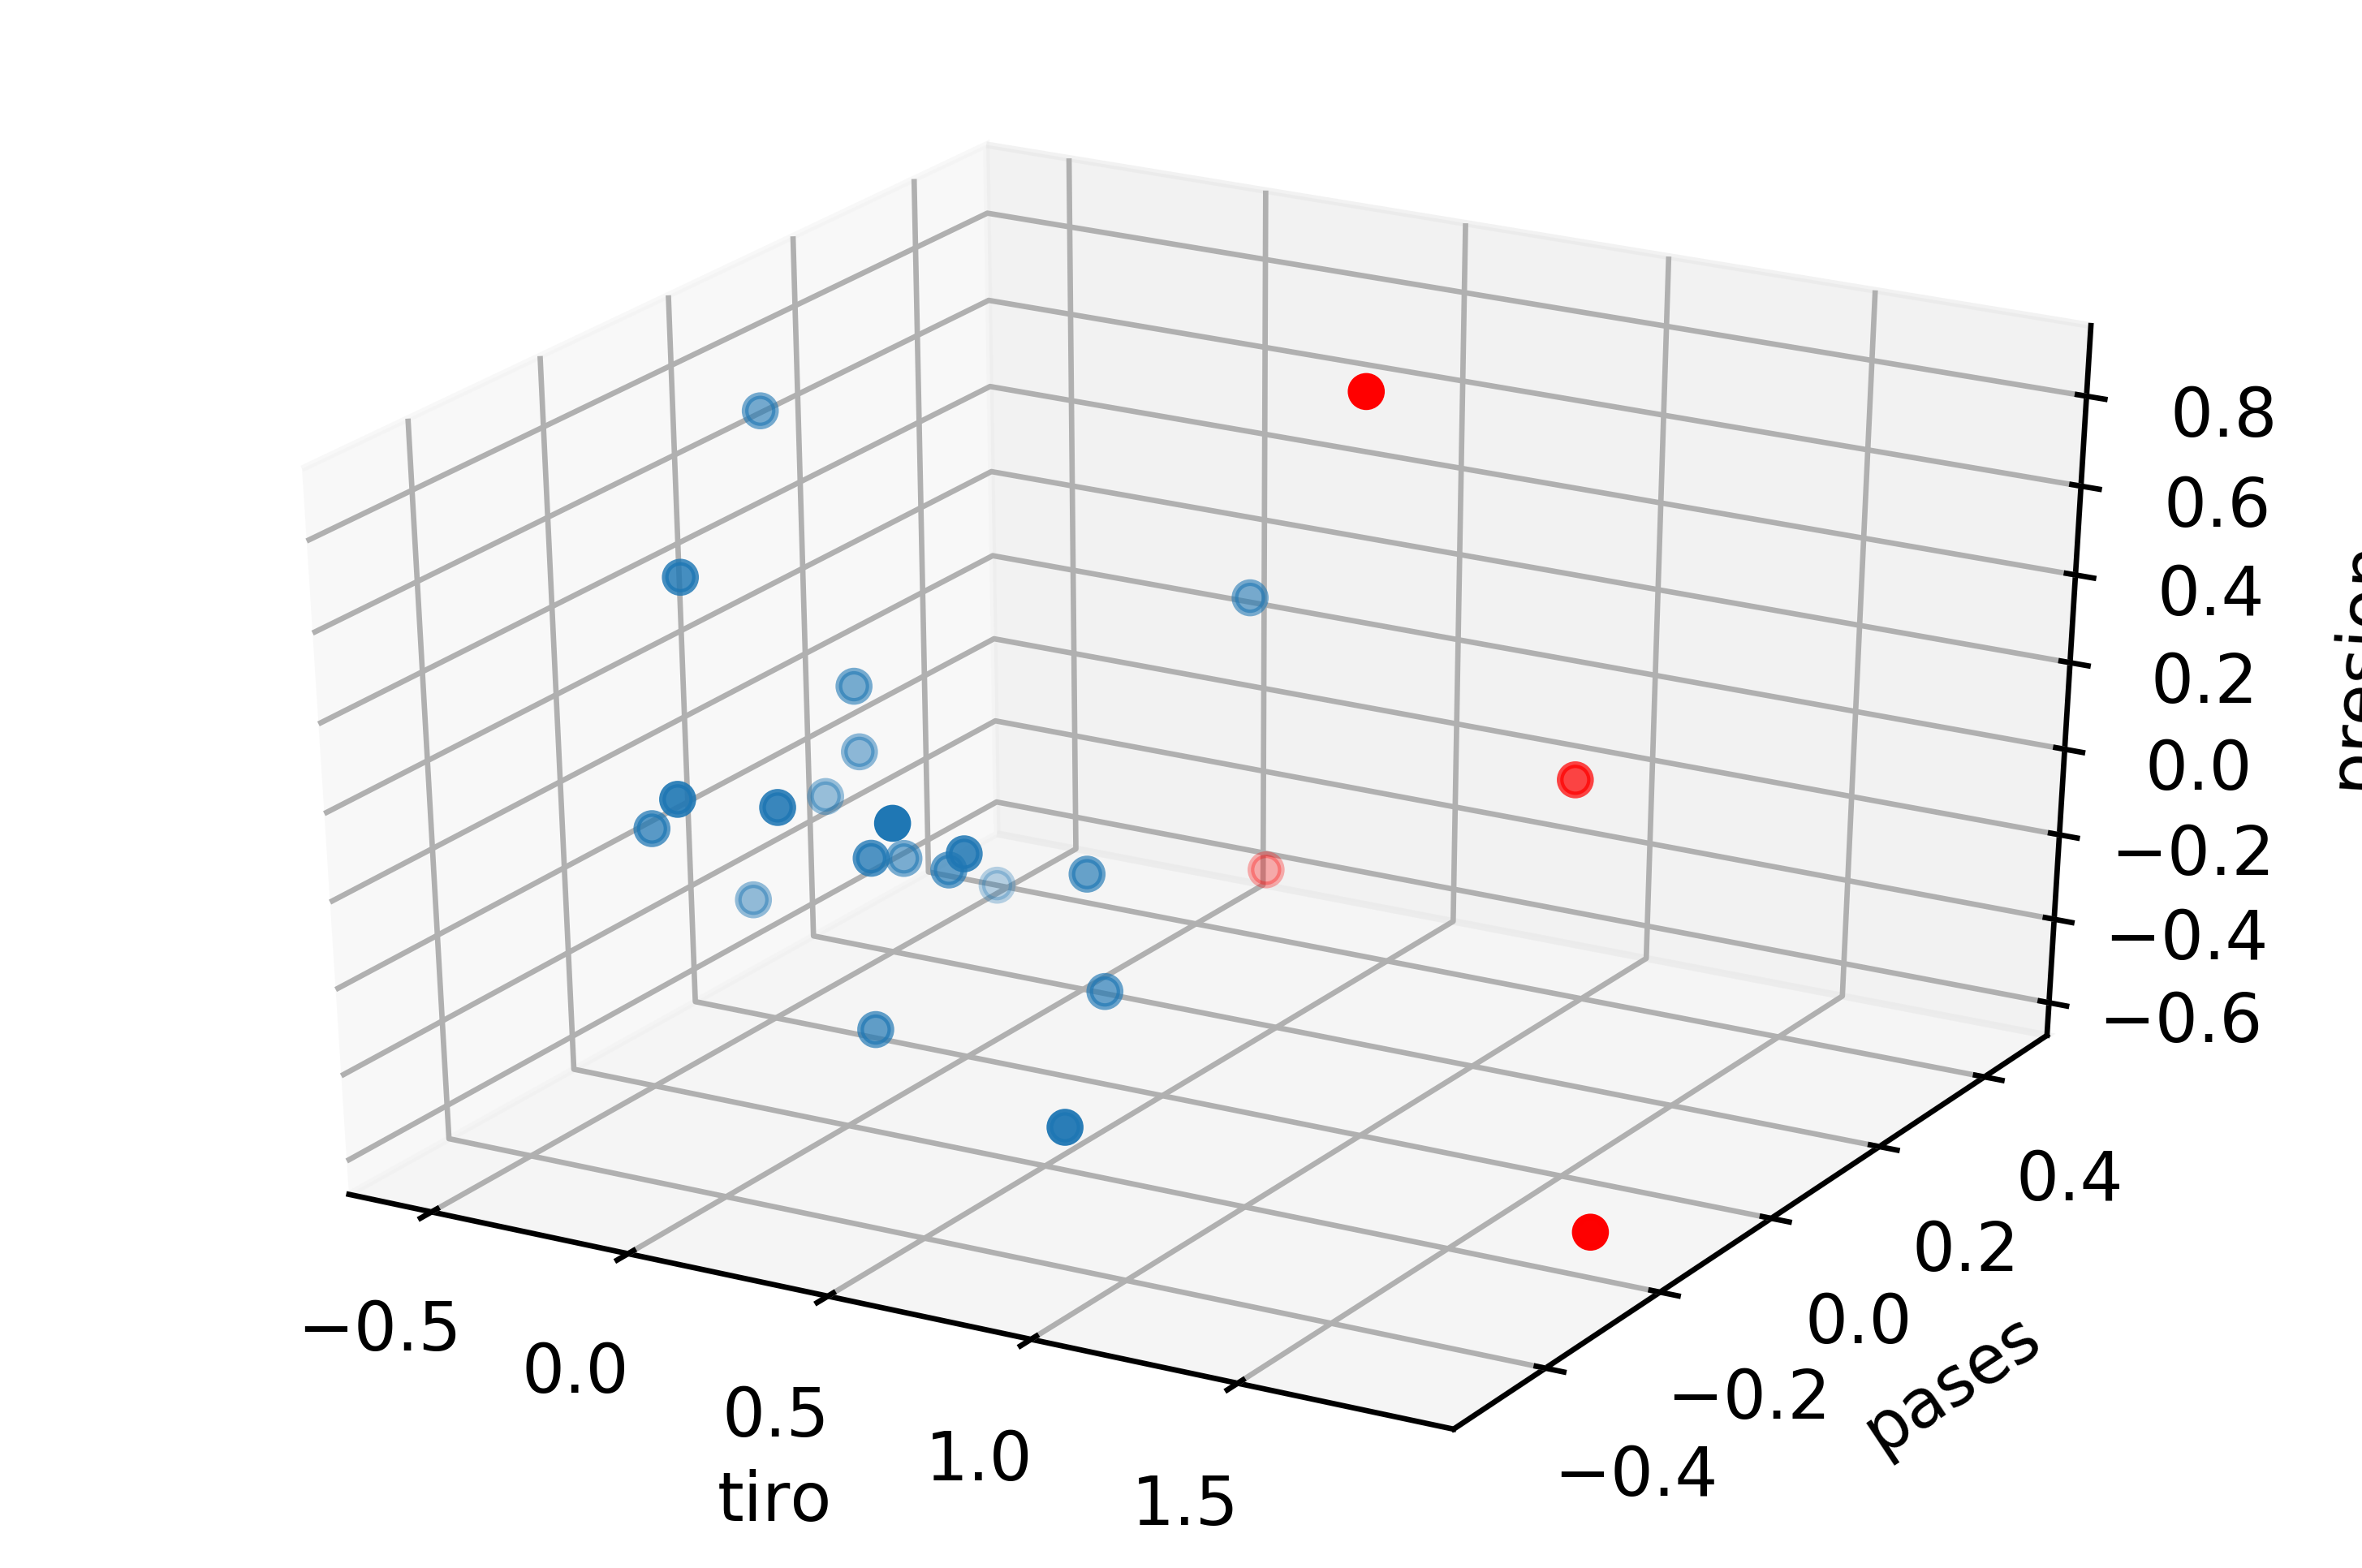

{(('b400bde0', 1, '2017-2018', 'Raheem Sterling'), (1.142164185468421, 0.27227547408979597, -0.03268234313333335)), (('21a66f6a', 1, '2017-2018', 'Harry Kane'), (1.8399685366, -0.19785039392448978, -0.5750675918333333)), (('dbf053da', 3, '2017-2018', 'Jadon Sancho'), (0.10682216381578946, 0.45330880959795916, -0.5691843303166667)), (('810e3c74', 1, '2017-2018', 'Jesse Lingard'), (0.7501377911052632, 0.17322681790408165, 0.8510582801666668))}


In [35]:
categories = ['tiro','pases','presion']
pareto_3d = get_pareto_points_3d(df_categories,'FW','England','2017-2018',categories,graph_all=True)